# Part I - Ford GoBike System Data Exploration
## by Wilson Uduma

## Introduction
> This data set includes information about member rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling
This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike = pd.read_csv('fordgobike-tripdata.csv')
bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# assessing a concise summary of the fordgobike dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Assessing the number of rows and columns in the fordgobike dataframe
bike.shape

(183412, 16)

In [5]:
#Assessing the datatypes of the columns in fordgobike dataframe
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
# descriptive statistics for numeric variables
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


We observe that there are null cells in the data frame, so we would be doing some cleaning. 

In [7]:
# Assessing the number of missing values in the fordgobike dataframe
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df = bike.dropna()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [9]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
df.shape

(174952, 16)

We would also be dropping some columns we would not be using for our exploration, so as to make our analysis more tidy. But first we must make a copy of the data frame.

In [11]:
df_clean = df.copy()

In [12]:
# Make a list of the columns to be dropped
drop_column = ['start_station_id', 'start_station_latitude', 'start_station_longitude',
             'end_station_id','end_station_latitude', 'end_station_longitude']

# Drop the columns 
df_clean.drop(drop_column, axis=1, inplace=True)

In [13]:
#Review our code to see if the columns in the list were dropped
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [14]:
df_clean['member_birth_year'].value_counts().sort_index()

1878.0       1
1900.0      53
1901.0       6
1902.0      11
1910.0       1
          ... 
1997.0    3476
1998.0    3208
1999.0    2504
2000.0    1675
2001.0      34
Name: member_birth_year, Length: 75, dtype: int64

We see that the birth year of some of individuals in the dataframe extends to the 1880s and 1920s which shows that they are either old or wrong data (as no human being on earth is 120+ years old). These data won't be needed so we would be removing them and making our data to start from an average human age of 70 years since we also noticed duration sec is 2019.

In [15]:
df_clean.drop(df_clean[df_clean['member_birth_year'] <= 1948].index, inplace = True)

In [16]:
#Review our code to see if we no longer have missing values
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

This feels nice. But not to get too excited, we review to see if we have the same number of rows in the dataframe 

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174377 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174377 non-null  int64  
 1   start_time               174377 non-null  object 
 2   end_time                 174377 non-null  object 
 3   start_station_name       174377 non-null  object 
 4   end_station_name         174377 non-null  object 
 5   bike_id                  174377 non-null  int64  
 6   user_type                174377 non-null  object 
 7   member_birth_year        174377 non-null  float64
 8   member_gender            174377 non-null  object 
 9   bike_share_for_all_trip  174377 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.6+ MB


We do have the same number of rows in the dataframe, but it turns out that we have member_birth_year as a float instead of an int data type (as no year has a decimal point haha). We also notice that start_time and end_time are object instead of datetime type and bike_id should be converted to a string data type

In [18]:
# Convert start_time column to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

# Convert end_time column to datetime
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# Convert bike_id column to string
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

# Convert member_birth_year column to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [19]:
# Review our code to see confirm the change in datatypes
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name                 object
end_station_name                   object
bike_id                            object
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [20]:
df_clean['start_time'].value_counts().sort_index()

2019-02-01 00:00:20.636    1
2019-02-01 00:04:40.616    1
2019-02-01 00:04:49.724    1
2019-02-01 00:05:34.360    1
2019-02-01 00:05:34.744    1
                          ..
2019-02-28 23:55:35.104    1
2019-02-28 23:56:26.848    1
2019-02-28 23:56:55.540    1
2019-02-28 23:57:57.211    1
2019-02-28 23:59:18.548    1
Name: start_time, Length: 174366, dtype: int64

In [21]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No


In [22]:
df_clean['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [23]:
#looking through at some categorical variables entries
df_clean['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [24]:
df_clean.shape

(174377, 10)

### What is the structure of your dataset?

> There are 174,377 individual entries in the dataset with 10 features (duration_sec, start_time, end_time, start_station_name, end_station_name, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip). Most variables are categorical in nature, but the variable duration are numeric in nature.


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for determining the different bike sharing habits of a subscriber and a Customer .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that bike_share_for_all_trip will have the strongest effect in determining which user_type shares during a trip or not. Also, the duration_sec could show more insight on how long an average trip take, which would be further analyzed for each user_type.

## Univariate Exploration


I'll start by looking at the distribution of one of the main variable of the bike-sharing system : user_type


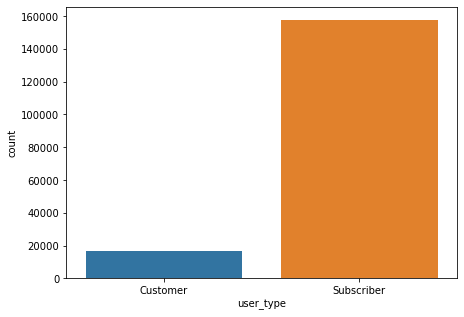

In [25]:
# start with a standard-scaled plot
plt.subplots(figsize=(7,5))
sb.countplot(data=df_clean, x='user_type');

From the display, we can see that we have more subscribers than customers. I'm guessing subscriber means someone on a paid plan with Ford GoBike while Customer is someone not on a paid plan but whose usage of their service is based on demand. This means that Ford GoBike is doing well in terms of increasing their revenue and brand loyalty. 

We would also need to put this display in a uniformed color format as well as ordering based on frequency, so Subscriber comes first since it's has more frequency than Customer.

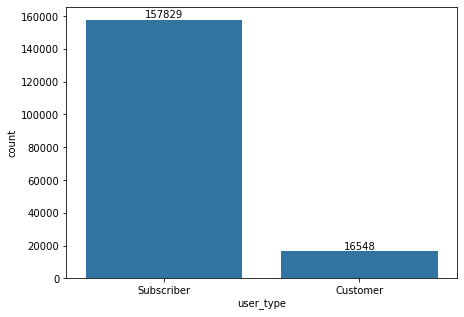

In [26]:
plt.subplots(figsize=(7,5))

base_color = sb.color_palette()[0]

freq = df_clean['user_type'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Use the `color` argument
ax= sb.countplot(data=df_clean, x='user_type', color=base_color, order=gen_order)
ax.bar_label(ax.containers[0]);

I also added a value label to tell me exactly the total number of Subscriber and Customer respectively. Since we are just exploring.

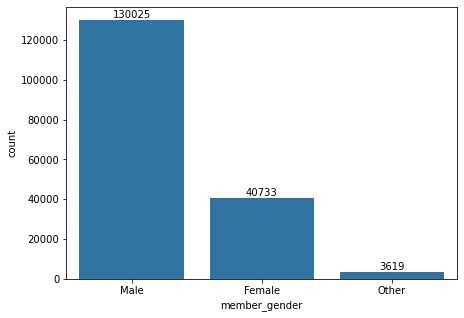

In [27]:
#next is to explore member_gender in a standard scale
plt.subplots(figsize=(7,5))

base_color = sb.color_palette()[0]

freq = df_clean['member_gender'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Use the `color` argument
ax = sb.countplot(data=df_clean, x='member_gender', color=base_color, order=gen_order)

#label the bars
ax.bar_label(ax.containers[0]);

We can see gender diversity on Ford GoBike with More males than females and more females than others. This information is helpful as we can also use it to know which gender category were customers and subscribers. 

Now, let's move on to get the bike sharing information of all individuals

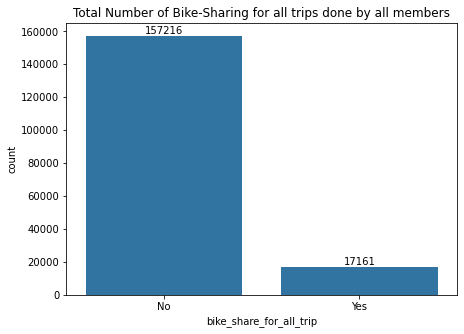

In [28]:
# start with a standard-scaled plot
plt.subplots(figsize=(7,5))
plt.title('Total Number of Bike-Sharing for all trips done by all members')

base_color = sb.color_palette()[0]

freq = df_clean['bike_share_for_all_trip'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Use the `color` argument
ax = sb.countplot(data=df_clean, x='bike_share_for_all_trip', color=base_color, order=gen_order)

#label the bars
ax.bar_label(ax.containers[0]);

While we are simply exploring, I chose to make use of my visual editing skills, and we can see that the not many individuals bike-shard for all their trips compared to those that did. This information is useful to tell us which of those individuals were male, female or other and we can further break down such analysis by user type.

Now, let's get more information on the birth year of each individuals.

In [57]:
def myHistPlot(df,xVar, interval, figsize = [14,6], title = ''):
    #set intervals for bins
    bins = np.arange(df[xVar].min(),df[xVar].max()+interval, interval)
    #plot
    df[xVar].hist(bins = bins, grid=False, edgecolor = 'black', figsize = figsize)
    #for labels, add a space instead of an underscore
    xVar = xVar.replace("_"," ")
    #Add a title and format it
    plt.title(f'Distribution of {xVar}{title}'.title(), fontsize = 14, weight = 'bold')
    #Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    #Add x label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

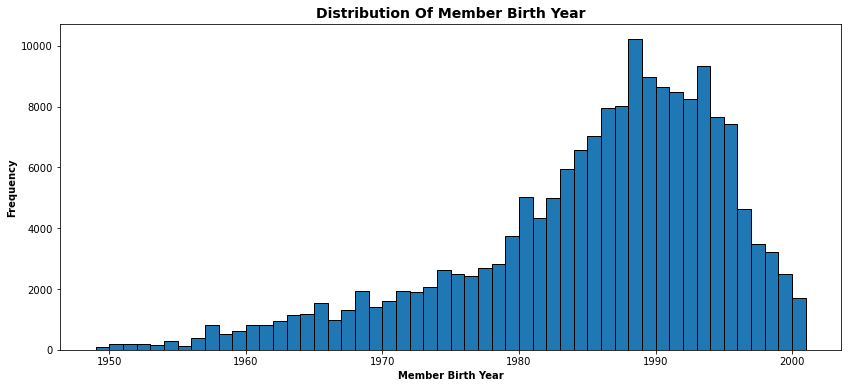

In [58]:
#call plot function (using all data)
myHistPlot(df_clean, 'member_birth_year',1)

Because we had cleaned our dataframe to only contain members aged 70 and below we can see from the display that most of the customers/subscribers of Ford GoBike are milennials (aged between 1980 - 2000). Let's look at the frequency distributon

In [30]:
#looking through its frequency distribution
print(df_clean['member_birth_year'].value_counts().sort_index())

1949       99
1950      178
1951      180
1952      189
1953      158
1954      301
1955      134
1956      392
1957      807
1958      517
1959      624
1960      806
1961      821
1962      955
1963     1151
1964     1189
1965     1546
1966      989
1967     1315
1968     1927
1969     1414
1970     1590
1971     1924
1972     1909
1973     2080
1974     2633
1975     2503
1976     2435
1977     2706
1978     2830
1979     3756
1980     5011
1981     4344
1982     4987
1983     5953
1984     6557
1985     7023
1986     7953
1987     8010
1988    10214
1989     8967
1990     8640
1991     8484
1992     8245
1993     9323
1994     7654
1995     7420
1996     4637
1997     3476
1998     3208
1999     2504
2000     1675
2001       34
Name: member_birth_year, dtype: int64


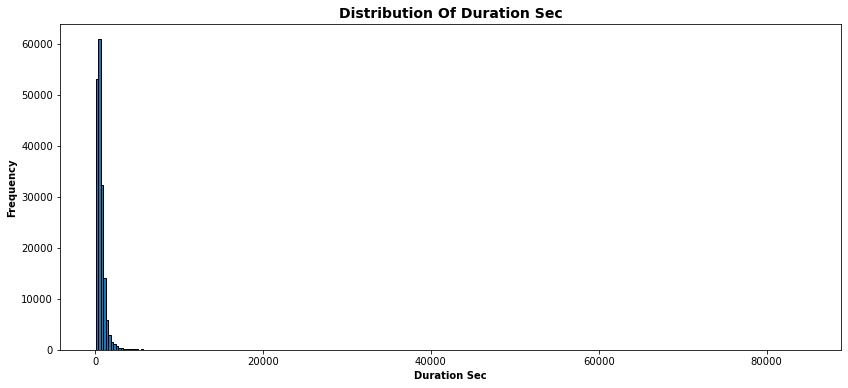

In [59]:
#call plot function (using all data)
myHistPlot(df_clean, 'duration_sec',300)

Here, we set the interval at 300secs and we can see that most of the data a concentrated around 0 and 20,000. So we need to explore further.

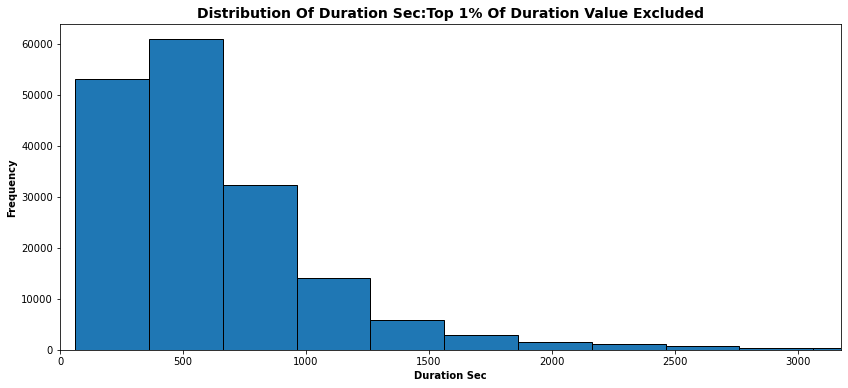

In [61]:
#call plot function (using all data)
myHistPlot(df_clean, 'duration_sec',300, title = ':Top 1% of Duration Value Excluded')
#set upper bound x axis (99th percentile)
plt.axis([0,df_clean['duration_sec'].quantile(0.99), None, None]);

In [32]:
print(df_clean['duration_sec'].value_counts().sort_index())

61       15
62       19
63       20
64       17
65       22
         ..
82512     1
83195     1
83407     1
83519     1
84548     1
Name: duration_sec, Length: 4422, dtype: int64


From the value_count function, we see that we have a min duration of 61secs with 15 occurrences and a max duration of 84548 secs with just 1 occurrence. This explains why the visual above looks like that. But to get more insight, we need to explore the variable in logarithmic format.

In [63]:
#since we know the min as 61, let's get the log of the minimum value
np.log10(df_clean['duration_sec'].min())

1.7853298350107671

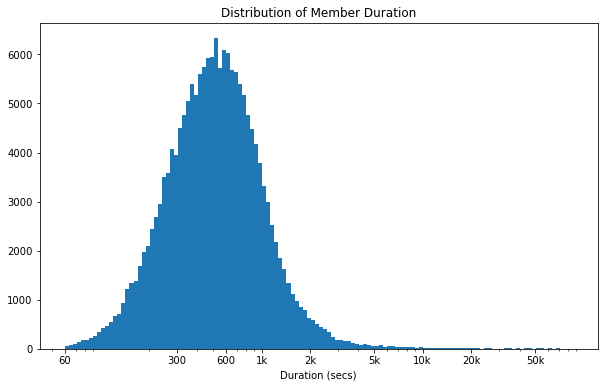

In [64]:
# let's put all observations on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(1.78, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Member Duration')
plt.xscale('log')
plt.xticks([60, 300, 600, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [60, 300, 600, '1k', '2k', '5k', '10k', '20k','50k'])
plt.xlabel('Duration (secs)')
plt.show()

From the display above, we can see that there is more frequency of duration between 300secs and 1000secs and it is right skewed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the variables analyzed were categorical in nature which showed us how we had more for a particular variable subject compared to another. This can also be further explored with bivariate and multivariate visuals to get more insights that are valuable for Ford GoBike. Duration and birth_year were the non-categorical variable we explored and we saw the distribution for birth_year was left skewed, and we had to further transform our analysis for Duration using log, to confirm its right_skewed distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We had to make use of a log scale to identify the distribution of duration_sec, and I also had to clean the member_birth_year entries to show only members whose birth year were from 1949 and above, as we saw so many of the members had birth years in the 80s and early 90s which suggested that they were above a 100 years. That information is incorrect (How can you be riding bike and aged 100+ haha).

## Bivariate Exploration

To start off with, I want to look at the each categorical date compared with their birth_year.

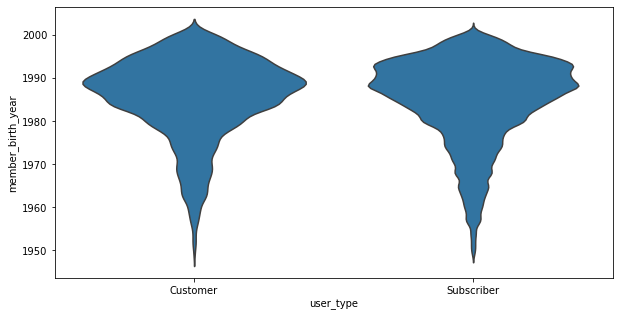

In [34]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=df_clean, x='user_type', y='member_birth_year', color=base_color, inner=None)
plt.xticks();

We can see on the display above that the curve is wider around birth_year 1990. This suggests that both customer and subscribers of Ford GoBike are mostly born around 1990. Now, let's use a box plot to get some more insights.

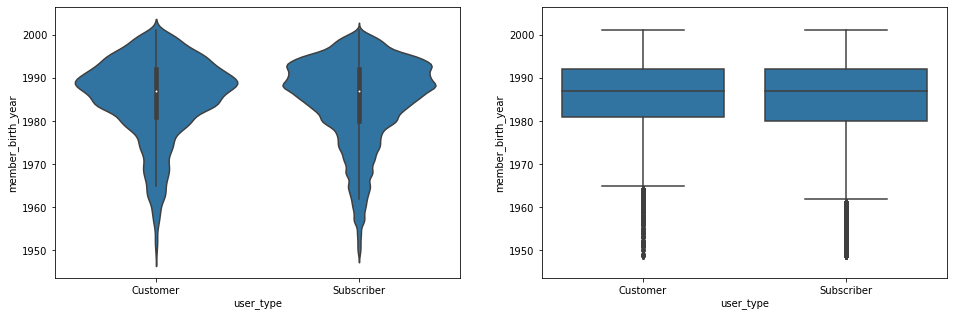

In [35]:
# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_clean, x='user_type', y='member_birth_year', color=base_color)
plt.xticks();

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='user_type', y='member_birth_year', color=base_color)
plt.xticks();
plt.ylim(ax1.get_ylim());

Decided to place both a violin and a box plot side by side, to express their differences. With a box plot, we can see more explicitly that both Customers and subscribers are mostly born between 1980 and 1990 (interquartile ranges and median). Now, let's look at the gender and birth_year of our data.

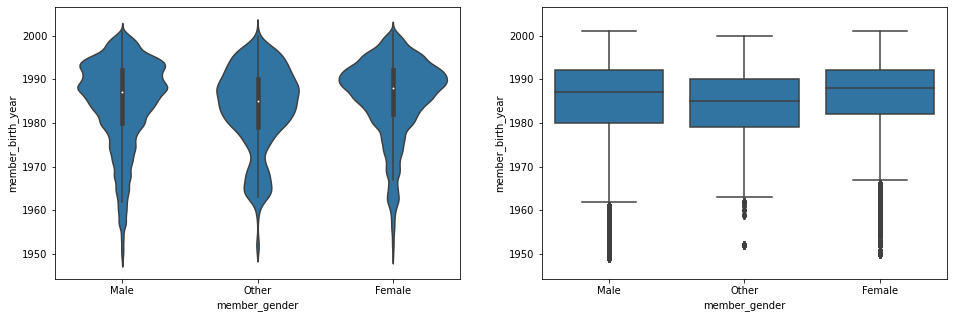

In [36]:
# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_clean, x='member_gender', y='member_birth_year', color=base_color)
plt.xticks();

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='member_gender', y='member_birth_year', color=base_color)
plt.xticks();
plt.ylim(ax1.get_ylim());

With the violin and box plots, we can see that the gender of every member and their birth year. Similarly, we have its male, female and other gender category mostly born between 1980 and 1990. There a small differences by gender birth_year but they are all millennials.

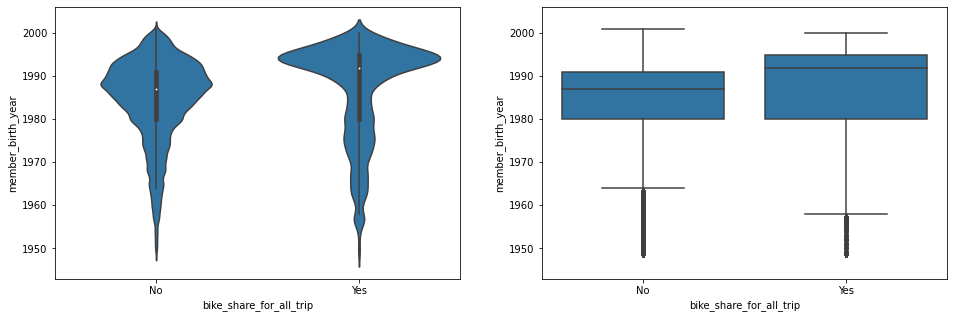

In [37]:
# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_clean, x='bike_share_for_all_trip', y='member_birth_year', color=base_color)
plt.xticks();

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='bike_share_for_all_trip', y='member_birth_year', color=base_color)
plt.xticks();
plt.ylim(ax1.get_ylim());

We also had to look at the display of members who bike-shared for all trip and their birth_year. We can see in the respective plots that they fall between 1965 and 2000 for those that didn't bike-share and between 1980 and 1990 (somewhere around there) for those that did. This could tell us that younger members bike-share more than older members.

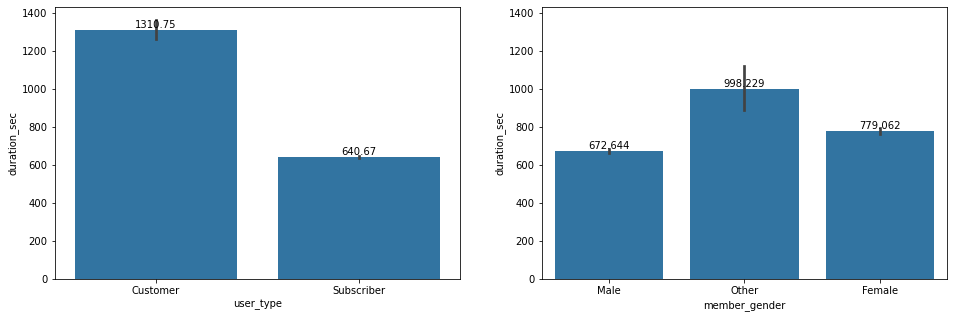

In [38]:
# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# First plot: Bar plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.barplot(data=df_clean, x='user_type', y='duration_sec', color=base_color)
plt.xticks()
ax1.bar_label(ax1.containers[0]);

# Second plot: Bar plot
plt.subplot(1, 2, 2)
ax = sb.barplot(data=df_clean, x='member_gender', y='duration_sec', color=base_color)
plt.xticks();
plt.ylim(ax1.get_ylim())
ax.bar_label(ax.containers[0]);

We had to take a look at the user_type and duration to understand what category of members spend more time on the bike. we can see that customers spent a duration of 1310.75 secs(approx. 21minutes). Subscribers on the other hand, spent a duration of 640 secs (approx. 10minutes). Thus, once can say Customers spent twice as more time on the bikes as Subscribers.


Out of curiousity, I had to take a look at the member_gender and duration relationship in the second plot, to understand which gender category of members spend more time on the bike. We can see that males spent 672secs, Others spent 998secs, and female spent 779secs. Thus, we can conclude that Other gender category spent more time on the bikes followed by females and then males.

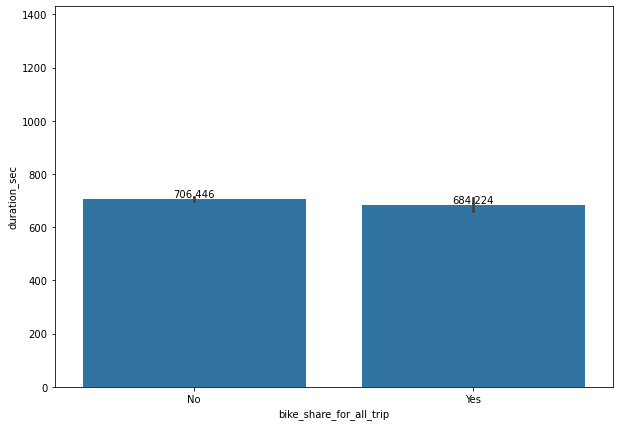

In [39]:
# Third plot: Bar plot
plt.figure(figsize = [10, 7])
ax = sb.barplot(data=df_clean, x='bike_share_for_all_trip', y='duration_sec', color=base_color)
plt.xticks();
plt.ylim(ax1.get_ylim())
ax.bar_label(ax.containers[0]);

Like I hadn't gotten tired of visuals already, I went further to look at the bike_share and duration relationship to understand whether bike_share had any influence on the duration a member spent on a bike. It is interesting to see that those who did not bike share spent more time on the bike compared to those who did. Although the duration for each category are very close, 22secs was what made all the difference betweeen them.

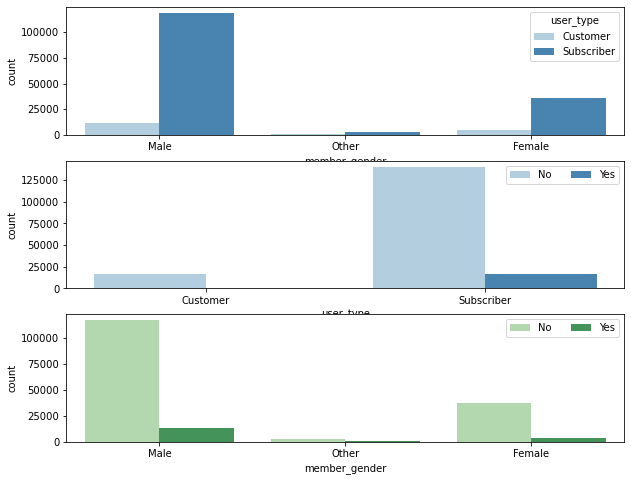

In [40]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 8])

# subplot 1: member_gender vs user_type
plt.subplot(3, 1, 1)
sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type', palette = 'Blues')

# subplot 2: user_type vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_clean, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member_gender vs. bike_share_for_all_trip, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_clean, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

From the display above, we had an overview of the relationship between each category data, and the insights we got are quite interesting. Let's explore each display further with different visuals below. 

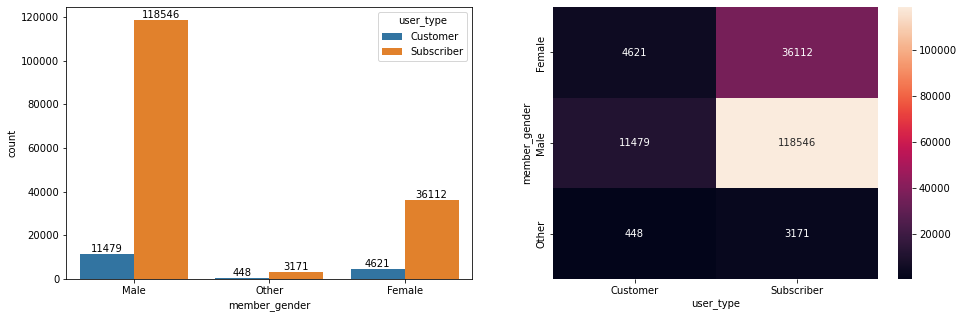

In [41]:
plt.figure(figsize = [16, 5])
# LEFT plot: Clustered Barchart
plt.subplot(1, 2, 1)
ax =sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.subplot(1, 2, 2)
# RIGHT plot: Heat Map
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = df_clean.groupby(['member_gender', 'user_type']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');

First, we have the gender and user_type relationship to understand which gender had more or less customers to subscribers. We explored both barchart and a heatmap with labels on them and we can see that each gender category across had less customers than subscribers and the male with the highest subscriber base. Once can say that the Ford GoBike business appeals more to the male gender market compared to other gender and if they seek for more diversity to increase revenue, they can do more campaign to female and other gender category. Or they could become more aggressive to capture more male gender market share over its competitors.

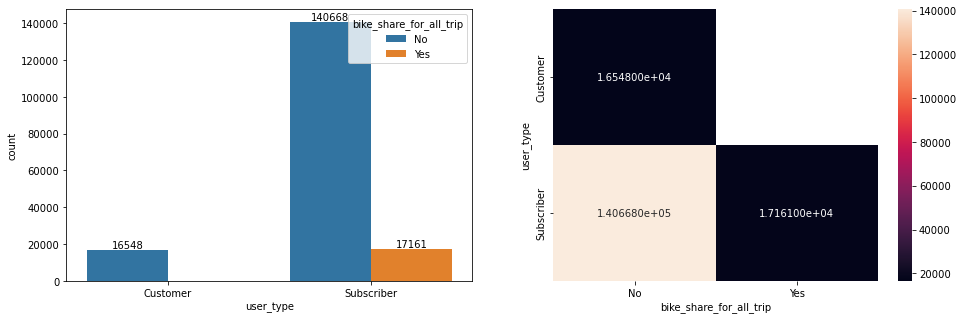

In [42]:
plt.figure(figsize = [16, 5])
# LEFT plot: Clustered Barchart
plt.subplot(1, 2, 1)
ax =sb.countplot(data = df_clean, x = 'user_type', hue = 'bike_share_for_all_trip')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.subplot(1, 2, 2)
# RIGHT plot: Heat Map
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = df_clean.groupby(['user_type', 'bike_share_for_all_trip']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'bike_share_for_all_trip', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'e');

Second, we have the bike_share and user_type relationship to understand which member category had a bike share or not in all their trips. We explored both barchart and a heatmap with labels on them and we can see that no Customer bike-shared for all their trips while Subscribers did (17,161 of them). It could mean that Customer member category were more focused in biking alone to "test" their usage of FordGoBike's service before they can become Subscribers. It could also mean that Subscribers are the only member category that seem to have the time or eagerness to bike-share during their trip. It also further means that most FordGoBike's Subscribed members don't bike-share during their trips.

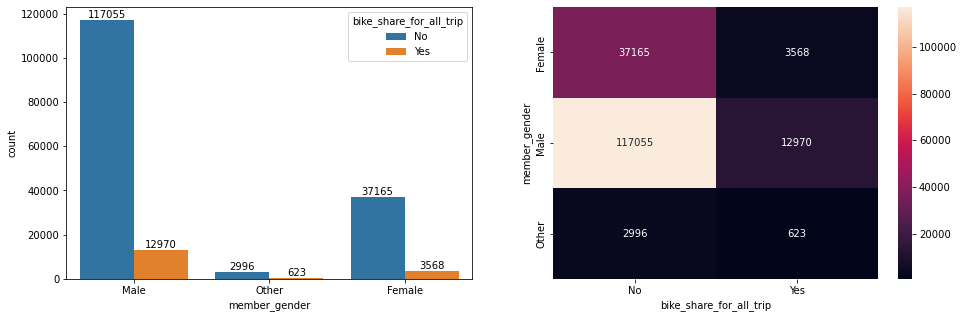

In [43]:
plt.figure(figsize = [16, 5])
# LEFT plot: Clustered Barchart
plt.subplot(1, 2, 1)
ax =sb.countplot(data = df_clean, x = 'member_gender', hue = 'bike_share_for_all_trip')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);


plt.subplot(1, 2, 2)
# RIGHT plot: Heat Map
ct_counts = df_clean.groupby(['member_gender', 'bike_share_for_all_trip']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'bike_share_for_all_trip', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');

Lastly, we have the gender and bike-share relationship to understand which gender bike-shared more than others. We explored both barchart and a heatmap with labels on them and we can see that more of each gender category across did not bike-share for all their trips, compared to those that did. And of course, with a major frequency of male members, we have more of them not bike-sharing and bike-sharing compared to other gender categories.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For each display above, you can see comments below to tell you what's happening with each features and it's interesting to be able to compare categorical with numerical variables to understand relationships as well as further exploring how one variable may influence another variable.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I sure did. It was very interesting to see that no Customer bike shared for all their trips in all the data irrespective of gender. Meaning if you were male, female or other and a Customer user_type of FordGoBike, you did not bike-share. 

## Multivariate Exploration

The major thing I want to explore in this part of the analysis, is how the three categorical variables compare towards duration mostly and then birth year.

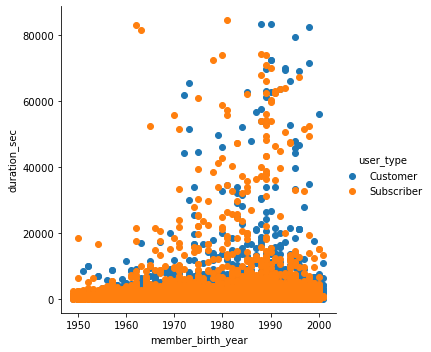

In [44]:
g = sb.FacetGrid(data = df_clean, hue = 'user_type', height = 5)
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend();

From our first display, we can see that more of our data lies below the 20,000secs duration for both customer and subscriber. And while we can also further explore the data by changing the limit, we seem to have notice something else. Member_birth_year seems to be some form of categorical data other than numeric data hence we would refrain from using scatter plots in our exploration. This is also because of our inability to really identify specifically which user_type were born around a particular year. We would be using a box plot to explore more.

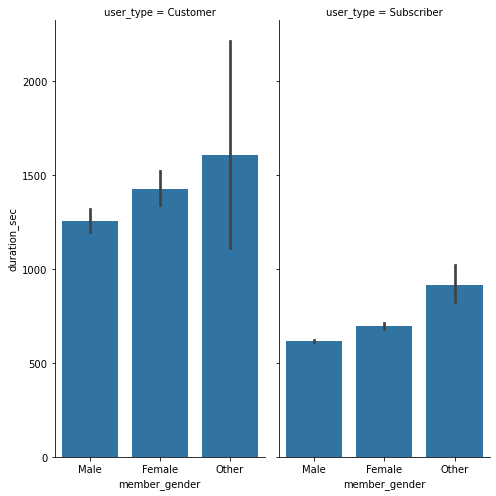

In [45]:
g = sb.FacetGrid(df_clean, col="user_type", height=7, aspect=.5)
g.map(sb.barplot, "member_gender", "duration_sec", order=["Male", "Female", "Other"])

Bar plots seems to represent numerical variables better, and from our display above, we can see that for each user_type category - Other gender seem to spend more time on their bikes than other genders (with male the least - surprising for a gender category with the highest data)

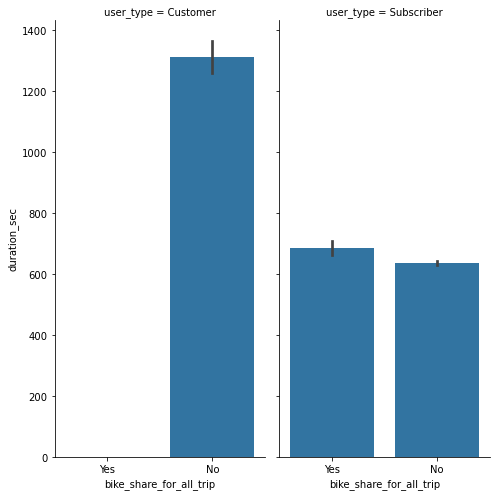

In [46]:
g = sb.FacetGrid(df_clean, col="user_type", height=7, aspect=.5)
g.map(sb.barplot, "bike_share_for_all_trip", "duration_sec", order=["Yes", "No"]);

From the display above, we can see that there are no Customer member category who bike-shared on their trip, hence they spent no time on the bike compared to those Customers who did not bike-share and have a duration 1300secs. Interestingly, we see that there are more Subscribers who bike-shared compared to those who did not, with a duration of around 700secs. This could also mean that Customers don't generally bike-share but Subscribers do. And it makes sense for those who bike-share to have a longer duration than those who don't.

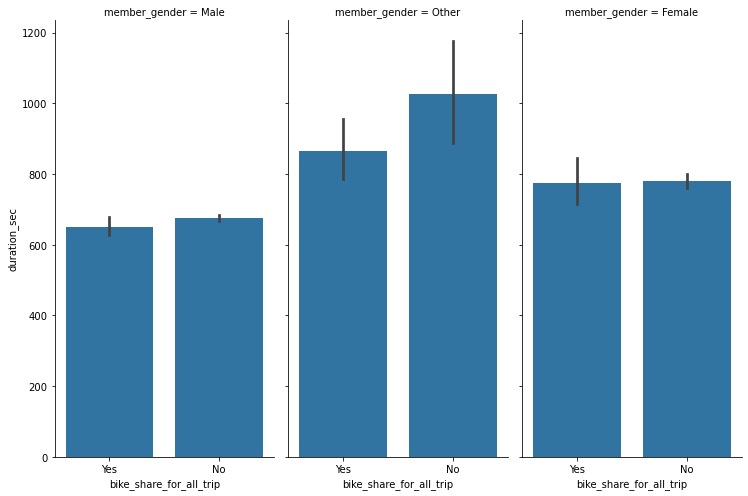

In [47]:
g = sb.FacetGrid(df_clean, col="member_gender", height=7, aspect=.5)
g.map(sb.barplot, "bike_share_for_all_trip", "duration_sec", order=["Yes", "No"]);

From the analysis above, we can see that "Other" gender category spent more time on their bikes and bike-shared more compared to other genders(female then male). It's also interesting to see that across genders, they spend less time bike-sharing. Thus, each gender spend more time on their bikes when they are not bike-sharing during their trips.

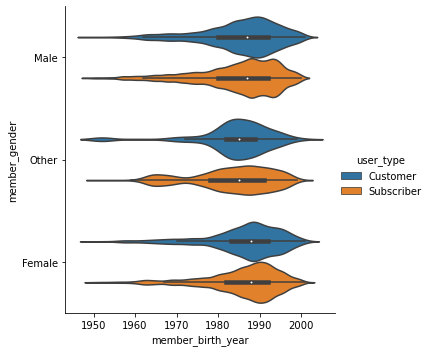

In [48]:
sb.catplot(x="member_birth_year", y="member_gender", hue="user_type",
            kind="violin", data=df_clean);

For categorical variables, it is always nice to display them in violin or box plots. This displays the user_type of each gender category and their birth_year in a violin plot. Let's see what that looks like in a box plot.

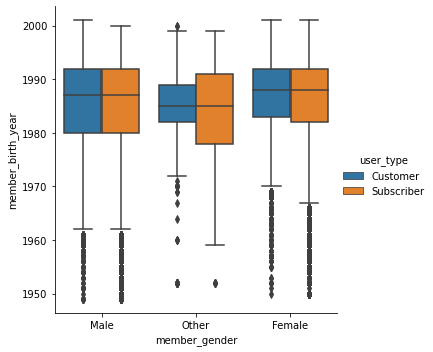

In [49]:
sb.catplot(x="member_gender", y="member_birth_year", hue="user_type",
            kind="box", data=df_clean);

Same data in a box plot, and we can see that we have more male customers and subscribers born between 1980 and 1990. For "Other", we see that more customers are born between 1980 and 1990 and for Subscribers, bewteen 1980 and 1990. For Females customers, more are born between 1980 and 1990, while subscribers are born between 1980 and 1990.

In summary, all gender categories, irrespective of user_type seem to be born between 1980 and 1990. There are also outliers of course.

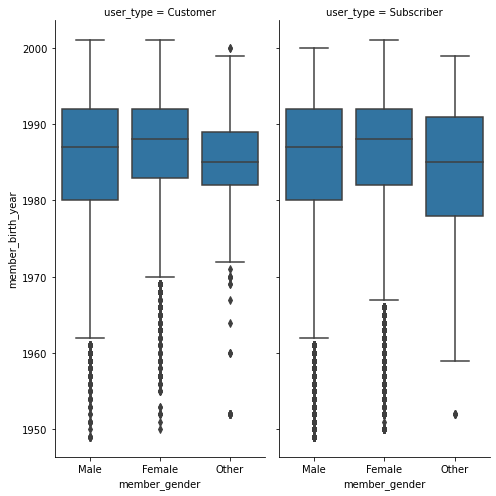

In [50]:
g = sb.FacetGrid(df_clean, col="user_type", height=7, aspect=.5)
g.map(sb.boxplot, "member_gender", "member_birth_year", order=["Male", "Female", "Other"]);

The visual above separate customers and subscribers for each gender category and their birth_year as we have explored previously, to give a more enhanaced view of analysis.

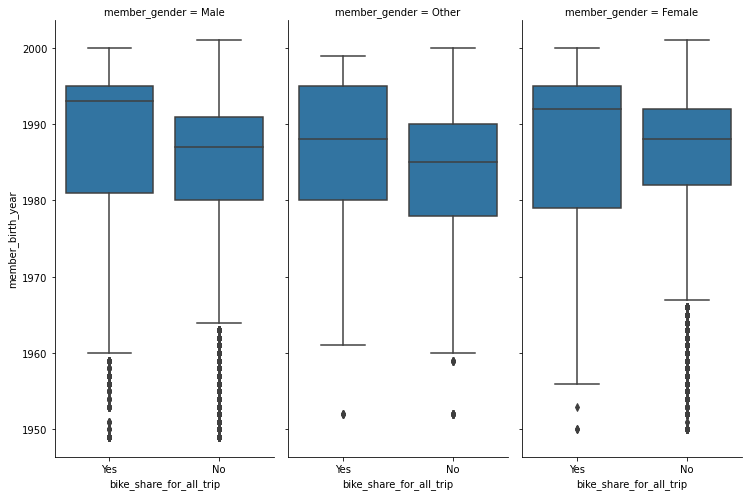

In [51]:
g = sb.FacetGrid(df_clean, col="member_gender", height=7, aspect=.5)
g.map(sb.boxplot, "bike_share_for_all_trip", "member_birth_year", order=["Yes", "No"]);

From the display above we can see that we have more female members that were born between 1980 and 1995 bike-shared while those born between 1980 and 1990 did not. We also see that Other members born between 1980 and 1995 bike-shared, while those born between 1980 and 1990 did not. Lastly, we can see that male members born between 1980 and 1995 bike-shared, while those born between 1980 and 1995 did not.

In summary, across all gender categories, members who bike shared seem to be born between 1980 and 1995, while those that did not bike share seem to be born between 1980 and 1990. One can say the older you get, the less likely you are willing to bike share haha.

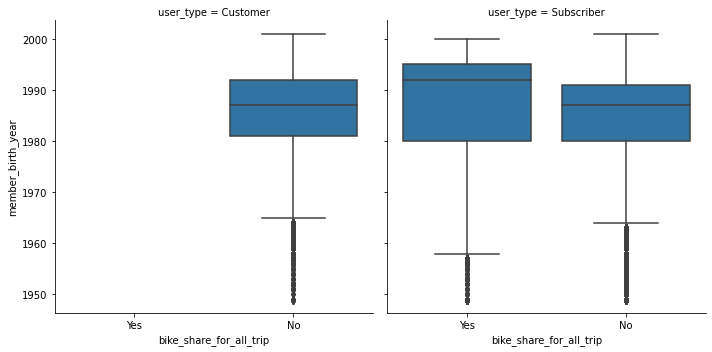

In [52]:
g = sb.FacetGrid(data = df_clean, col = 'user_type', height = 5)
g.map(sb.boxplot, 'bike_share_for_all_trip', 'member_birth_year', order=["Yes", "No"]);

From the display above, we can see clearly that no customer bike-shared, thus their birth_year isn't captured. This means that all customers did not bike share and they mostly fall between 1980 and 1990. For Subscribers, we can see that members born around 1995 bike-shared, while those that were born around 1990 did not.

In summary, again, younger generations seem to bike share more than older generations.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I realized after playing with several visuals that it is best to use barplot for numerical variables and box/violin plot for categorical variables. And this helped me clearly explore my data with insightful visuals. For each display, I left detailed observation to capture my thoughts and impressions.

### Were there any interesting or surprising interactions between features?

> Yes, there was! It was interesting tp see that there are more Subscribers who bike-shared compared to those who did not, with a duration of around 700secs. This was quite insightful to have observed and could also mean that Customers don't generally bike-share but Subscribers do. And it makes sense for those who bike-share to have a longer duration than those who don't.

## Conclusions

In the exploration, I observed that the average trip taken by all members in the dataset was around 726secs (about 12 minutes). I found that there were more Subscribers than Customers in the dataset as well as more of those members being male, compared to female and other. Also, most members were born between 1985 and 1995 and there was a huge number of members who did not bike share compared to those who did. 

I further explored the relationship between these categorical variables and the birth year, and I observed irrespective of user_type, member_gender or bike_share, members were mostly born around 1980 and 1990. This was useful to have noticed as it showed that across all categorical data, Ford GoBike's members were millennials. After that, I explored the relationship between the categorical variables and the duration. I observed that Customers spent twice as more time on the bikes as subscribers. Also, Others gender category spent more time on the bike than Females and Males. Lastly, those who did not bike-share for all of their trips spent more time on their bikes than those who did (only by few seconds).

I went further to explore multiple relationships between some categorical variables and duration. I observed that for each user_type, Others gender category seem to spend more time on their bikes than other genders (with male the least - surprising for a gender category with the highest data). Interstingly, we observed that Customers don't generally bike-share but Subscribers do and each gender spend more time on their bikes when they are not bike-sharing during their trips than when they are bike-sharing.

Lastly, I explored multiple relationships between some categorical variables and birth_years. I observed that all gender categories, irrespective of user_type, seem to be born between 1980 and 1990. And the older you get, the less likely you are willing to bike share. To put in another way, younger generations seem to bike share more than older generations.

Going through the step of univariate, bivariate, and finally multivariate was pretty useful I'd say as each form of exploration tells you something different about your data when they are explored individually as well as when they are explored with other variables. I would not have noticed that we didn't have any customer who bike-shared on our data if we didn't explore both the user_type and bike_share_for_all_trips data together. 


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

